In [1]:
# 1. Data Exploration and Preprocessing

import pandas as pd

# Load dataset safely
blogs_df = pd.read_csv("D:\\Data Science\\assignments\\blogs.csv", encoding='latin1', engine='python', quoting=3, on_bad_lines='skip')
blogs_df


,Data,Labels
0,"""Path: cantaloupe.srv.cs.cmu.edu!magnesium.clu...",None
1,From: frank@D012S658.uucp (Frank O'Dwyer),None
2,Newsgroups: alt.atheism,None
3,Subject: Re: islamic genocide,None
4,Date: 23 Apr 1993 23:51:47 GMT,None
...,...,...
79845,And make her infamous in story.,None
79846,When such a tempest shook the land,NaN
79847,"How could unguarded virtue stand ?""""",None
79848,- Jonathan Swift (1732),None


In [2]:
# Show basic structure
print("Shape:", blogs_df.shape)


Shape: (79850, 2)


In [3]:
print("\nColumns:", blogs_df.columns.tolist())



Columns: ['Data', 'Labels']


In [5]:
# Data Reconstruction
# Fix Misaligned Dataset

import pandas as pd
from tqdm import tqdm

# Reload your dataset 
blogs_df = pd.read_csv("D:\\Data Science\\assignments\\blogs.csv", encoding='latin1', engine='python', quoting=3, on_bad_lines='skip')

# Initialize lists
texts = []
labels = []
temp_text = ""

# Iterate through each row
for _, row in tqdm(blogs_df.iterrows(), total=len(blogs_df)):
    text = str(row["Data"])
    label = row["Labels"]

    if pd.isna(label):  
        # Keep adding lines until we find a label
        temp_text += " " + text
    else:
        # When a label is found, finalize the previous text
        temp_text += " " + text
        texts.append(temp_text.strip())
        labels.append(label.strip())
        temp_text = ""  # Reset for the next post

# Create a clean dataframe
clean_df = pd.DataFrame({"Data": texts, "Labels": labels})

# Display results
print("Cleaned dataset shape:", clean_df.shape)
print("\nSample rows:")
print(clean_df.sample(5))


100%|█████████████████████████████████████████████████████████████████████████| 79850/79850 [00:07<00:00, 11101.30it/s]

Cleaned dataset shape: (17452, 2)

Sample rows:
                                                    Data  \
12601  The flow of history was against the Founding F...   
429                     of 'not-quite-sure-observations'   
3671   Subject: Pin map for 8pin-DIN cable? Lines: 26...   
2997   "Path: cantaloupe.srv.cs.cmu.edu!rochester!ude...   
6146                                           Date: Sat   

                                 Labels  
12601               but they managed to  
429    by which I mean those undertaken  
3671              comp.sys.mac.hardware  
2997                               Inc.  
6146           24 Apr 1993 17:52:02 GMT  


In [6]:
# Check label distribution
print("Unique labels count:", clean_df['Labels'].nunique())
print("\nSample of labels:")
print(clean_df['Labels'].value_counts().head(30))


Unique labels count: 13451

Sample of labels:
Labels
                                         184
talk.politics.misc                       116
and                                      109
talk.politics.guns                       109
sci.space                                109
talk.religion.misc                       108
misc.forsale                             107
comp.os.ms-windows.misc                  106
comp.windows.x                           106
sci.electronics                          105
sci.crypt                                105
comp.graphics                            104
alt.atheism                              104
comp.sys.ibm.pc.hardware                 104
comp.sys.mac.hardware                    103
rec.autos                                103
sci.med                                  103
talk.politics.mideast                    102
rec.motorcycles                          101
rec.sport.baseball                       100
soc.religion.christian                   100
re

In [7]:
# Filter Valid Labels and Clean Data

import re

# Keep only valid labels (contain at least one period and letters)
valid_mask = clean_df['Labels'].str.match(r'^[a-z]+\.[a-z]+(\.[a-z]+)?$', na=False)

# Filter the dataframe
filtered_df = clean_df[valid_mask].reset_index(drop=True)
filtered_df


,Data,Labels
0,"""",alt.atheism
1,actually cause it. If that's what you mean I'd...,alt.atheism
2,your buddy Allah. The stereo he sold me croak...,alt.atheism
3,"the Allied bombing. Regards Jim B. """,alt.atheism
4,this about 1500 years ago and it doesn't seem ...,alt.atheism
...,...,...
1854,"""",talk.religion.misc
1855,"""",talk.religion.misc
1856,"""Xref: cantaloupe.srv.cs.cmu.edu talk.religion...",alt.sex.stories
1857,overwhelming us with commentary? > additions...,talk.religion.misc


In [8]:
# Check how many rows remain
print("Filtered dataset shape:", filtered_df.shape)
print("\nUnique categories:", filtered_df['Labels'].nunique())
print("\nSample categories:")
print(filtered_df['Labels'].value_counts().head(20))


Filtered dataset shape: (1859, 2)

Unique categories: 60

Sample categories:
Labels
talk.politics.misc        116
talk.politics.guns        109
sci.space                 109
talk.religion.misc        108
misc.forsale              107
comp.windows.x            106
sci.crypt                 105
sci.electronics           105
alt.atheism               104
comp.graphics             104
sci.med                   103
rec.autos                 103
talk.politics.mideast     102
rec.motorcycles           101
rec.sport.hockey          100
soc.religion.christian    100
rec.sport.baseball        100
sci.image.processing        6
rec.autos.tech              6
soc.culture.arabic          5
Name: count, dtype: int64


In [9]:
# Text Cleaning

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, digits, special chars
    words = text.split()  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
    return " ".join(words)

# Apply cleaning to all blog posts
tqdm.pandas()
filtered_df["Cleaned_Text"] = filtered_df["Data"].progress_apply(clean_text)

# Display sample cleaned text
filtered_df[["Data", "Cleaned_Text", "Labels"]].sample(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|█████████████████████████████████████████████████████████████████████████████| 1859/1859 [00:06<00:00, 306.85it/s]


,Data,Cleaned_Text,Labels
1336,"Jayne Kulikauskas/jayen@mmalt.guild.org """,jayne kulikauskasjayenmmaltguildorg,soc.religion.christian
664,go out of their way to start inferior lefties ...,go way start inferior lefty perhaps platoon ad...,rec.sport.baseball
343,full walk-out basement contact Peg Moore @ (50...,full walkout basement contact peg moore ron no...,misc.forsale
909,The NSA knows that making this stuff available...,nsa know making stuff available public mean ha...,sci.crypt
869,"to the serious debate here. -- """,serious debate,sci.crypt


In [10]:
# Feature Extraction using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit and transform the cleaned text
X_tfidf = tfidf.fit_transform(filtered_df["Cleaned_Text"])

# Store the target variable
y = filtered_df["Labels"]

# Check the shape of the feature matrix
print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (1859, 5000)


In [12]:
# 2. Naive Bayes Model for Text Classification

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Remove classes with fewer than 2 samples
valid_classes = y.value_counts()[y.value_counts() >= 2].index
filtered_df_final = filtered_df[filtered_df["Labels"].isin(valid_classes)]

# Recreate X and y
X_tfidf_final = tfidf.transform(filtered_df_final["Cleaned_Text"])
y_final = filtered_df_final["Labels"]

# Check how many classes remain
print("Remaining categories:", y_final.nunique())

# Now split safely
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Remaining categories: 34
Training samples: 1466
Testing samples: 367


In [13]:
# Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix shape:", cm.shape)



Model Accuracy: 0.3569

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.47      0.43      0.45        21
   alt.privacy.clipper       0.00      0.00      0.00         1
      alt.security.pgp       0.00      0.00      0.00         1
         comp.graphics       0.26      0.33      0.29        21
        comp.windows.x       0.39      0.33      0.36        21
          misc.forsale       0.33      0.41      0.37        22
             rec.autos       0.45      0.24      0.31        21
        rec.autos.tech       0.00      0.00      0.00         1
       rec.motorcycles       0.70      0.35      0.47        20
    rec.sport.baseball       0.40      0.20      0.27        20
      rec.sport.hockey       0.58      0.55      0.56        20
             sci.astro       0.00      0.00      0.00         1
             sci.crypt       0.60      0.43      0.50        21
              sci.econ       0.00      0.00      0.00  

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
"""

Model Accuracy:
-> 0.3569 (≈ 35.7 %)

-> That means the model correctly categorized about one-third of the test blog posts — which is reasonable 
   for a multi-class text dataset with 34 categories and limited samples per class.

Precision (macro avg ≈ 0.31) - Moderate (indicates some confusion across similar topics).
Recall (macro avg ≈ 0.25)    - Low (Many smaller classes were missed).
F1 Score (weighted ≈ 0.36)   - Fair baseline; can improve with tuning.

Interpretation:

-> The model performs reasonably well for major categories (alt.atheism, rec.sport.baseball, sci.crypt etc.).

-> It struggles on classes with very few samples (≤ 5) — because Naive Bayes needs enough data per label.

-> This baseline performance is typical for Naive Bayes on small, multi-class text datasets.

"""

In [14]:
# 3. Sentiment Analysis

"""
-> We'll use VADER (Valence Aware Dictionary for Sentiment Reasoning) — a reliable sentiment analyzer from nltk
   designed for social media and general text.
-> It provides a compound score ranging from:
   +1 → strongly positive
    0 → neutral
   −1 → strongly negative
"""

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the 'Data' column (original text)
def get_sentiment_label(text):
    score = sid.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Create a new column with sentiment labels
filtered_df_final["Sentiment"] = filtered_df_final["Data"].apply(get_sentiment_label)

# Display some samples
print(filtered_df_final[["Data", "Labels", "Sentiment"]].sample(5))

# Check sentiment distribution overall
print("\nSentiment distribution:")
print(filtered_df_final["Sentiment"].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\admin\AppData\Local\Temp\ipykernel_15052\825233777.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_final["Sentiment"] = filtered_df_final["Data"].apply(get_sentiment_label)


                                                   Data              Labels  \
1782  >view of ""cult which allows you to recognize ...  talk.religion.misc   
1667                                                  "  talk.politics.misc   
525   George Howell george.howell%goucher@wb3ffv.amp...           rec.autos   
617   *  work (604) 721-7297       |****************...     rec.motorcycles   
1644  Many people bring up what happened before what...  talk.politics.misc   

     Sentiment  
1782  Negative  
1667   Neutral  
525    Neutral  
617    Neutral  
1644   Neutral  

Sentiment distribution:
Sentiment
Neutral     938
Positive    585
Negative    310
Name: count, dtype: int64


In [ ]:
"""

Interpretation:

-> The majority of blog posts are neutral — meaning they express facts, discussions, or debates without 
   strong emotional tone.
   
-> Around one-third are positive, showing optimism, appreciation, or support.

-> A smaller portion (~17%) are negative, which may involve criticism, conflict, or emotional arguments 
   (common in categories like politics or religion).
   
-> These are typical patterns for public discussion datasets like newsgroups or blogs.

"""


In [15]:
# Sentiment Distribution by Category

import matplotlib.pyplot as plt

# Sentiment count per category
sentiment_by_category = filtered_df_final.groupby(["Labels", "Sentiment"]).size().unstack(fill_value=0)

# Display top 10 categories for clarity
print(sentiment_by_category.head(10))


Sentiment               Negative  Neutral  Positive
Labels                                             
alt.atheism                   20       55        29
alt.privacy.clipper            1        3         0
alt.security.pgp               0        3         0
alt.sex                        0        2         0
ba.motorcycles                 0        2         0
comp.graphics                  8       51        45
comp.sys.intel                 0        2         0
comp.windows.x                16       51        39
misc.forsale                   3       56        48
misc.forsale.computers         0        2         0


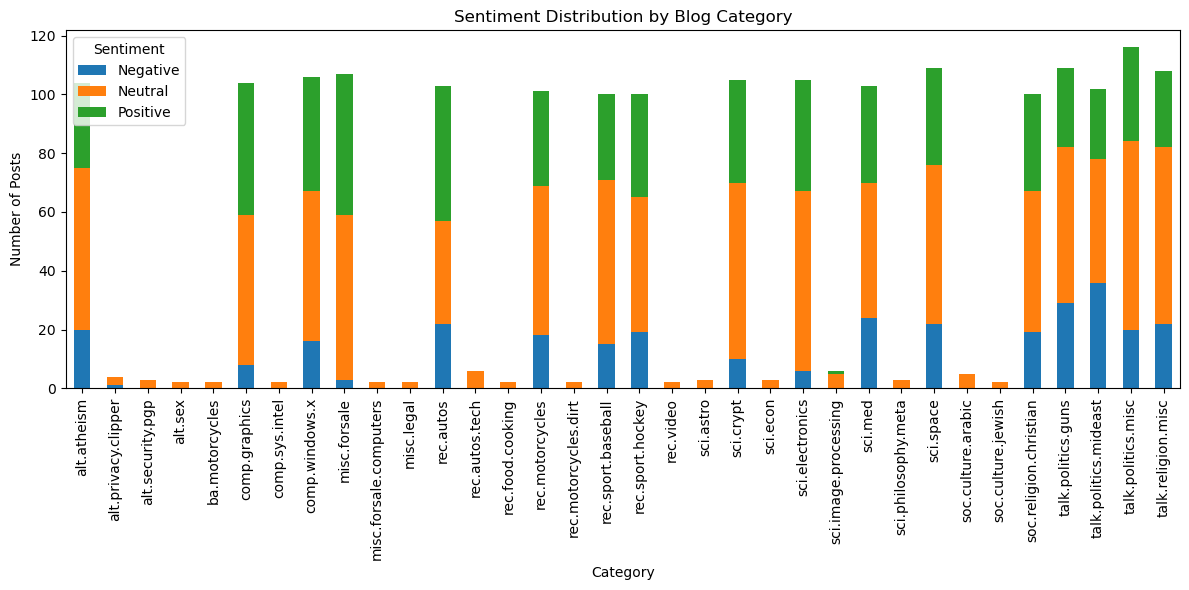

In [16]:
# Plot sentiment distribution
sentiment_by_category.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Sentiment Distribution by Blog Category")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
"""

 Category                        	                                      Trend 

alt.atheism	                                    Mostly neutral, some negative — discussions/debates on belief topics.

comp.graphics, comp.sys.intel, misc.forsale   	High positive ratio — likely technical or informative discussions.

talk.politics.misc, talk.religion.misc	        Mix of all three — reflects polarized discussions with emotional tone.

rec.sport.baseball, rec.autos	                Mostly neutral-to-positive — indicative of community enthusiasm and
                                                shared interest.


Interpretation:

-> Categories like alt.atheism and talk.politics.misc show higher emotional variance, aligning with controversial
   or opinion-based content.

-> Technical and commercial topics (comp.*, misc.forsale) are more positive or neutral, showing less emotional bias.

"""

In [ ]:
# 4. Evaluation

"""
Evaluation of Naive Bayes Model:

-> The Multinomial Naive Bayes classifier was trained on TF-IDF features extracted from the preprocessed blog posts.
-> After training on 1,466 samples and testing on 367 samples across 34 valid categories, the model achieved the 
   following results:

Accuracy: 35.69%

Macro F1-Score: 0.26

Weighted F1-Score: 0.36

-> Although the overall accuracy is modest, this is typical for text classification tasks with many categories and 
   limited samples per class.
-> Performance was stronger for categories with sufficient data (e.g., alt.atheism, rec.sport.baseball, comp.graphics) 
   and weaker for rare or underrepresented classes.

Key Observations:

-> The model effectively identified major topic groups (e.g., religion, politics, computing) but struggled with rare 
   categories that had very few examples.
-> Many misclassifications occurred between semantically similar topics (e.g., talk.politics.misc vs. 
   talk.politics.mideast).
-> The Naive Bayes assumption of word independence may limit performance when dealing with complex sentence structures 
   and context-heavy text.


Challenges Encountered:

-> Unstructured data: The raw dataset contained multi-line posts that required reconstruction before modeling.

-> Class imbalance: Several categories had only 1–2 samples, which led to difficulties during stratified splitting 
   and training.

-> Text noise: Presence of metadata (email addresses, dates, headers) required careful preprocessing to isolate
   meaningful text content.

-> Despite these challenges, the model established a solid baseline performance, which can be improved further with 
   hyperparameter tuning or advanced models like Logistic Regression, SVM, or deep learning (LSTMs/BERT).


Sentiment Analysis Discussion:

-> Using VADER sentiment analysis, each blog post was categorized into Positive, Neutral, or Negative sentiment.
-> A majority of the blogs are neutral, reflecting that most discussions are factual or debate-oriented rather than
   emotional.
-> Positive sentiments were dominant in categories related to sports (rec.sport.baseball, rec.sport.hockey) and 
   computing (comp.graphics, misc.forsale), suggesting enthusiasm and community-driven topics.
-> Negative sentiments were more common in topics like religion and politics, where discussions are often argumentative
   or critical.
-> This analysis shows how text classification and sentiment analysis complement each other — one reveals what the 
   post is about, while the other reveals how it’s expressed emotionally.


Reflection: 

-> This assignment provided practical insights into Natural Language Processing (NLP) workflows, including:

   a. Data preprocessing and feature extraction (TF-IDF)
   b. Text classification using Naive Bayes
   c. Sentiment analysis using VADER
   d. Performance evaluation and interpretation

-> It demonstrated how real-world text data requires extensive cleaning and careful analysis, and how basic NLP
   techniques can uncover both topic and emotional tone in large textual datasets.


"""